## 7.1 优化与深度学习

### 7.1.2 优化在深度学习中的挑战

In [11]:
%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch.utils as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

#### 7.1.2.1 局部最小值

> 1. **局部最小值:对于目标函数$f(x)$，如果$f(x)$在$x$上的值比在$x$邻近的其他点的值更小，那么$f(x)$可能是一个局部最小值（local minimum）**
> 2. **全局最小值: 如果$f(x)$在$x$上的值是目标函数在整个定义域上的最小值，那么$f(x)$是全局最小值（global minimum）**
$$ f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0, $$

Text(0, 0.5, 'f(x)')

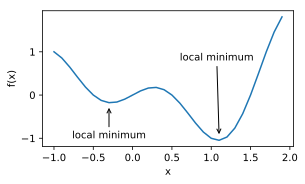

In [5]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0), arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('local minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8), arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

#### 7.1.2.2 鞍点

$$f(x) = x^3$$

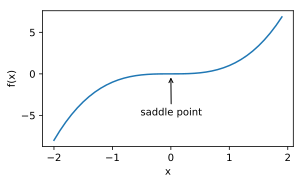

In [9]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x ** 3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

> 1.**一个函数的输入为$k$维向量，输出为标量，那么它的`海森矩阵（Hessian matrix）`有$k$个特征值**
> 2.**函数在梯度为0的位置上可能是局部最小值、局部最大值或者鞍点**
>     - 函数的海森矩阵在梯度为零的位置上的特征值全为正时，该函数得到局部最小值
>     - 当函数的海森矩阵在梯度为零的位置上的特征值全为负时，该函数得到局部最大值
>     - 当函数的海森矩阵在梯度为零的位置上的特征值有正有负时，该函数得到鞍点
> 3. **若$k$很大,任一特征值是正或者是负的概率都是0.5,则第一种情况的概率为$0.5^k$,目标函数的鞍点通常比局部最小值更常见**

$$f(x, y) = x^2 - y^2$$

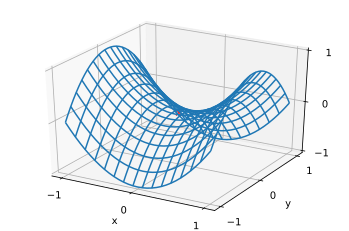

In [13]:
# 鞍点位置,在x轴方向局部最小,y轴方向局部最大
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');